# Analysis and Prediction of Graduate Admissions

Predict the probability of admission of certain students and the universities to which they apply. The datasets employed by this project contains several parameters which are considered significant during the application for Masters Programs and for our analysis/prediction.

- GRE Scores
- Undergraduate GPAs

Other parameters, such as TOEFL scores, Statement of Purpose, Letters of Recommendation, etc., are examined but will carry less weight in our analysis

Get a local copy of our employed datasets here:
- https://github.com/AlpAribal/gradcafestats/blob/master/data/submissions.csv
- https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?resource=download

## Part I: Import Cleaned Datasets

We will preform our data analysis and visualization on our new cleaned GradCafe and Kaggle datasets.

**Import the following packages using their common shortened name found in parentheses:**

* `numpy` (`np`)
* `pandas` (`pd`)
* `scipy` (`scipy`)
* `seaborn` (`sns`)
* `matplotlib.pyplot` (`plt`)

In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

**Read the CSV file `cleaned_grad_cafe_admissions.csv` into Python in and assign it to the variables `grad_cafe`.**

In [3]:
grad_cafe = pd.read_csv('data/cleaned_data/cleaned_grad_cafe_admissions.csv', low_memory=False)
grad_cafe = grad_cafe.drop(columns='Unnamed: 0')

grad_cafe.head()

,submissionDate,institution,major,degree,notif_result,notif_date,gpa,gre
0,2010-01-12,"University Of California, San Francisco (UCSF)",Neuroscience,PhD,Interview,2010-01-12,3.80,325.0
1,2010-01-12,"University Of California, San Francisco (UCSF)",Neuroscience,PhD,Interview,2010-01-12,3.86,326.0
2,2010-01-12,University College London,International Public Policy,Masters,Accepted,2009-11-26,3.60,309.0
3,2010-01-12,London School Of Economics (LSE),Master Of Public Administration (MPA),Masters,Accepted,2010-01-11,3.60,309.0
4,2010-01-12,Carnegie Mellon,Biological Sciences (Neuroscience),PhD,Interview,2010-01-12,3.40,331.0


**Read the first CSV file `cleaned_kaggle_grad_admissions.csv` into Python in and assign it to the variables `kaggle`.**

In [4]:
kaggle = pd.read_csv('data/cleaned_data/cleaned_kaggle_grad_admissions.csv', low_memory=False)
kaggle = kaggle.drop(columns='Unnamed: 0')

kaggle.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,3.860,1,0.92
1,324,107,4,4.0,4.5,3.548,1,0.76
2,316,104,3,3.0,3.5,3.200,1,0.72
3,322,110,3,3.5,2.5,3.468,1,0.80
4,314,103,2,2.0,3.0,3.284,0,0.65


## Part II: EDA of Kaggle's Graduate Admission Dataset

We will first preform data analysis on the Kaggle dataset. Although limited yet stat-driven compared to the GradCafe dataset, we will observe certain details that weigh into admission, and compare it to the GradCafe's data analysis later on.

### Written Description of Column Labels:
- `GRE Score`: GRE Scores ( out of 340 )
- `TOEFL Score`: TOEFL Scores ( out of 120 )
- `University Rating`: University Rating ( out of 5 )
- `SOP`: Statement of Purpose Strength ( out of 5 )
- `LOR`: Letter of Recommendation Strength ( out of 5 )
- `CGPA`: Scaled Undergraduate GPA ( out of 4.0 )
- `Research`: Research Experience ( either 0 or 1 )
- `Chance of Admit`: Percent Chance of Admit ( ranging from 0 to 1 )

In [5]:
# Display dataset statistics
kaggle.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,3.430576,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.241925,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,2.720000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,3.251000,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,3.424000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,3.616000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,3.968000,1.000000,0.97000


<AxesSubplot: ylabel='Chance of Admit'>

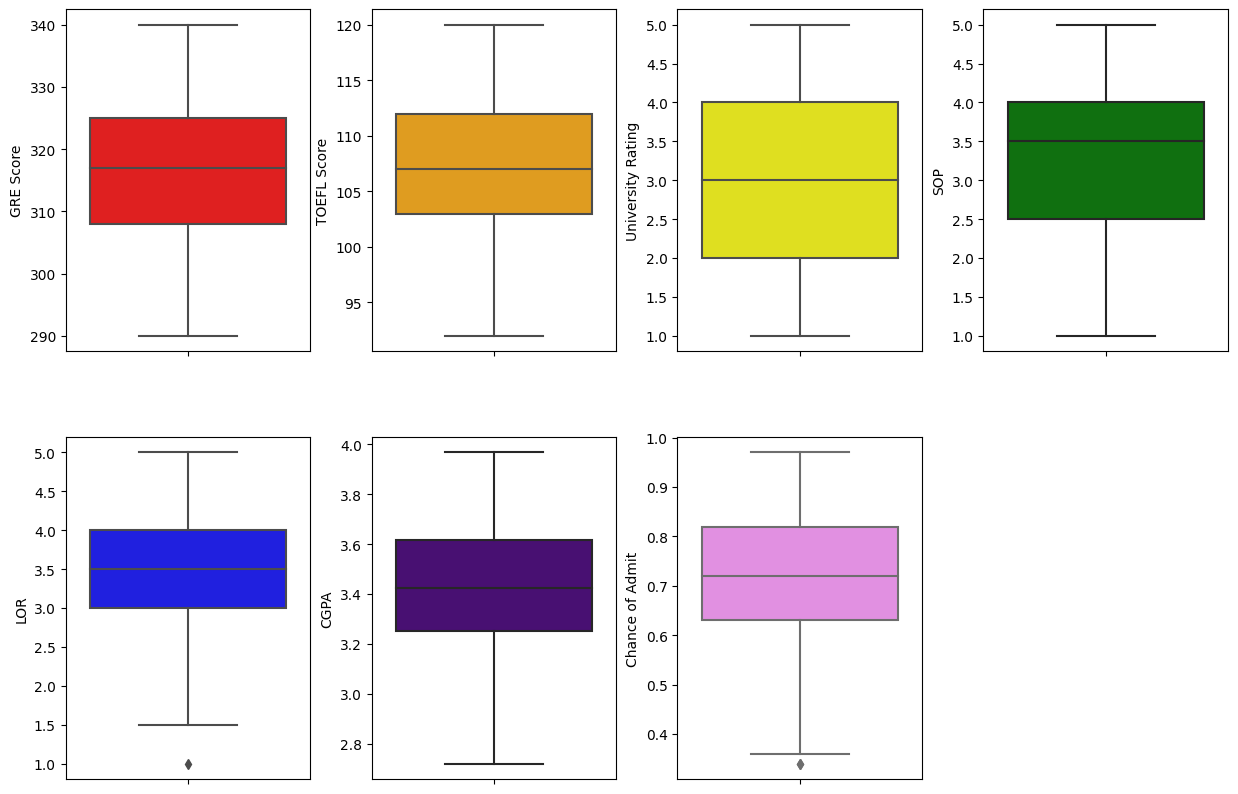

In [6]:
# Box plots of column labels
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.delaxes(axes[1][3])

# GRE Scores
sns.boxplot(y=kaggle['GRE Score'], ax=axes[0][0], color='red')

# TOEFL Scores
sns.boxplot(y=kaggle['TOEFL Score'], ax=axes[0][1], color='orange')

# University Rating
sns.boxplot(y=kaggle['University Rating'], ax=axes[0][2], color='yellow')

# Statement of Purposes
sns.boxplot(y=kaggle['SOP'], ax=axes[0][3], color='green')

# Letter of Recommendations
sns.boxplot(y=kaggle['LOR'], ax=axes[1][0], color='blue')

# CGPA
sns.boxplot(y=kaggle['CGPA'], ax=axes[1][1], color='indigo')

# Chance of Admission
sns.boxplot(y=kaggle['Chance of Admit'], ax=axes[1][2], color='violet')

array([[<AxesSubplot: title={'center': 'GRE Score'}>,
        <AxesSubplot: title={'center': 'TOEFL Score'}>,
        <AxesSubplot: title={'center': 'University Rating'}>,
        <AxesSubplot: title={'center': 'SOP'}>],
       [<AxesSubplot: title={'center': 'LOR'}>,
        <AxesSubplot: title={'center': 'CGPA'}>,
        <AxesSubplot: title={'center': 'Research'}>,
        <AxesSubplot: title={'center': 'Chance of Admit'}>]], dtype=object)

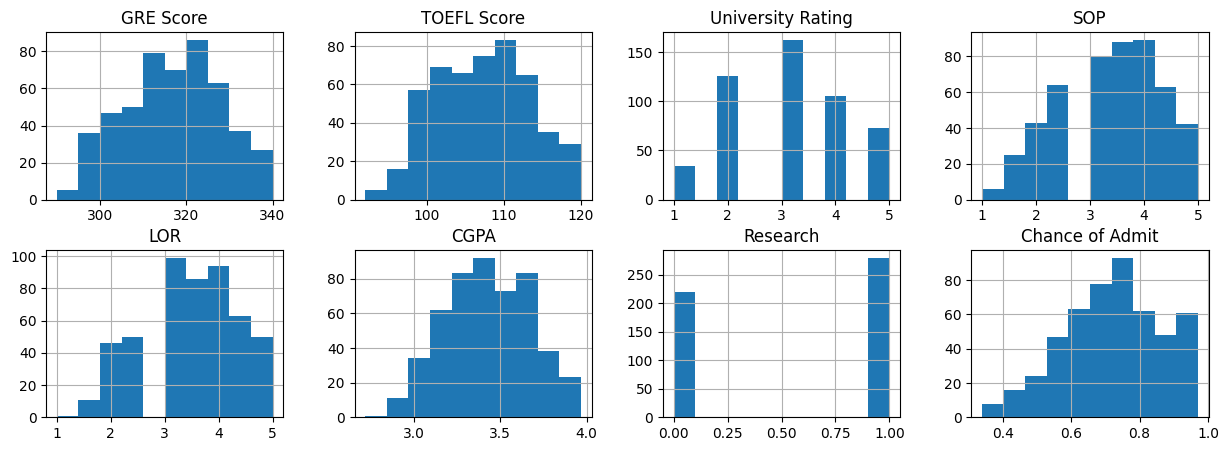

In [7]:
# Distribution of columns labels
kaggle.hist(figsize=(15,5), layout=(2,4))

**From these distribution plots, we can see that certain labels are approximately normally distribtued, esepcially GRE Scores and CGPAs which are important variables for our analysis**

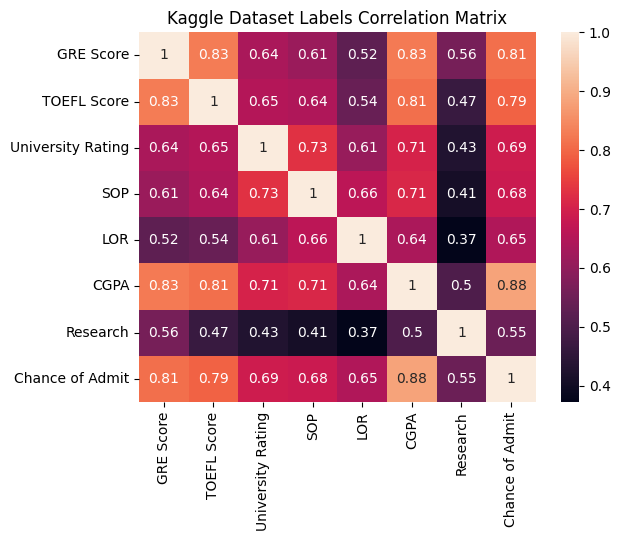

In [8]:
# Display correlation matrix
axes = plt.axes()

kaggle_correlation_matrix = kaggle.corr()
kaggle_correlation_matrix = sns.heatmap(kaggle_correlation_matrix, ax=axes, annot=True)
axes.set_title('Kaggle Dataset Labels Correlation Matrix')

plt.show()

**By examining a correlation matrix, we can pair column labels and observe if there is a significant correlation. On the important note, we can see that relative to all correlation coefficients, the correlation between `Chance of Admission` and `GRE Score` or `Chance of Admission` and `CGPA` is high. This suggests that these two variables are heavier factors in considering admissions compared to other variables.**

**Another interpretation to this correlation matrix is observing the `GRE Score`, `TOEFL Score`, and `CGPA` lables. Significantly, these labels are notions of an applicant's academic performance (based on classes or exams), and they all have strong correlations. Due to these correlations, one could suggest that a strong `CGPA` statistically implies a high test score, or, vicer versa, a strong `GRE Score` or `TOEFL Score` implies a high `CGPA`.**

<AxesSubplot: xlabel='CGPA', ylabel='GRE Score'>

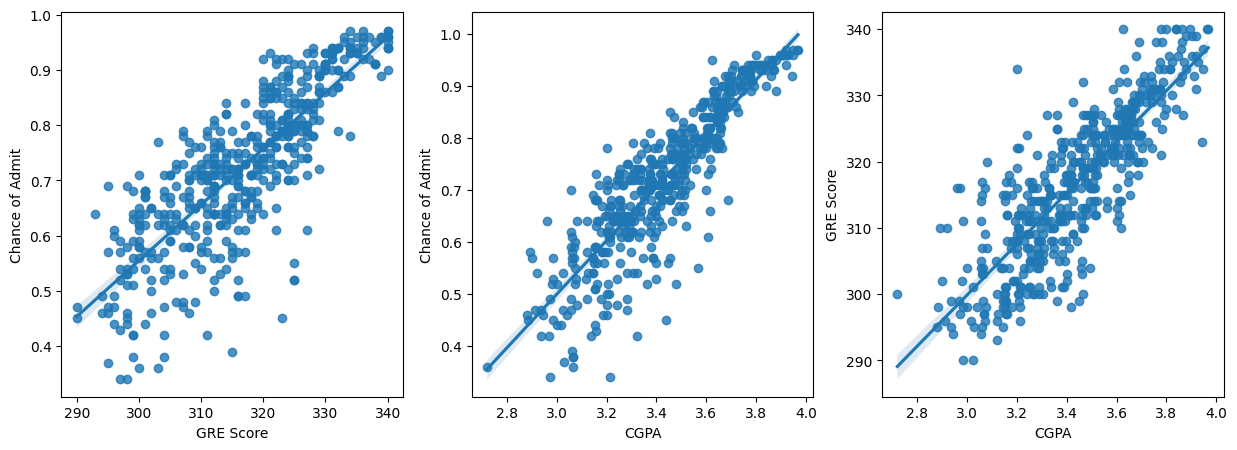

In [9]:
# Scatter plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# GRE Score vs Chance of Admission
sns.regplot(x='GRE Score', y='Chance of Admit', data=kaggle, fit_reg=True, ax=axes[0])

# CGPA vs Chance of Admission
sns.regplot(x='CGPA', y='Chance of Admit', data=kaggle, fit_reg=True, ax=axes[1])

# CGPA vs GRE Score
sns.regplot(x='CGPA', y='GRE Score', data=kaggle, fit_reg=True, ax=axes[2])

**Better visualization of correlation in our labels of interest:**
1. **`GRE Score` vs. `Chance of Admission`**
2. **`CGPA` vs. `Chance of Admission`**
3. **`CGPA` vs. `GRE Score`**

In [10]:
# Get pearson product-moment correlation

# GRE Score vs Chance of Admission
gre_r, _ = scipy.stats.pearsonr(x=kaggle['GRE Score'], y=kaggle['Chance of Admit'])

# CGPA vs Chance of Admission
cgpa_r, _ = scipy.stats.pearsonr(x=kaggle['CGPA'], y=kaggle['Chance of Admit'])

# CGPA vs GRE Score
cgpa_gre_r, _ = scipy.stats.pearsonr(x=kaggle['CGPA'], y=kaggle['GRE Score'])

print('Pearson Product-Moment Correlations:\n')
print(f'GRE Score vs Chance of Admission: {gre_r}')
print(f'CGPA vs Chance of Admission: {cgpa_r}')
print(f'CGPA vs GRE Score: {cgpa_gre_r}')

Pearson Product-Moment Correlations:

GRE Score vs Chance of Admission: 0.8103506354632601
CGPA vs Chance of Admission: 0.8824125749045735
CGPA vs GRE Score: 0.8258779536403551


## Part III: EDA of GradCafe's Graduate Admission Dataset

Same EDA rundown; however, we will look more closely to the `gre` and `gpa` column lables.

### Written Description of Column Labels:
- `submissionDate`: Graduate application submission date (`YYYY-MM-DD`)
- `institution`: Graduate School 
- `major`: Major
- `degree`: Degree level
- `notif_result`: Graduate application decision (`Accepted`, `Interview`, `Wait listed`, `Rejected`, `E-mail`, `Other`)
- `notif_date`: Graduate application decision date (`YYYY-MM-DD`)
- `gpa`: Scaled Undergraduate GPA ( out of 4.0 )
- `gre`: GRE Scores ( out of 340 )

In [11]:
# Display dataset statistics
grad_cafe.describe()

,gpa,gre
count,152256.000000,152256.000000
mean,3.654765,318.556037
std,0.375907,18.483358
min,0.250000,0.000000
25%,3.500000,313.000000
50%,3.740000,321.000000
75%,3.900000,327.000000
max,4.000000,340.000000


<AxesSubplot: ylabel='gre'>

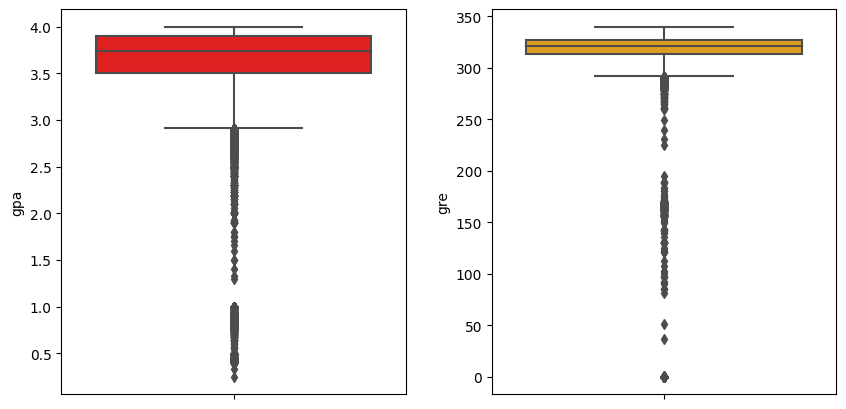

In [12]:
# Box plots of column labels
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.25, wspace=0.25)

# GPA 
sns.boxplot(y=grad_cafe['gpa'], ax=axes[0], color='red')

# GRE Scores
sns.boxplot(y=grad_cafe['gre'], ax=axes[1], color='orange')

array([[<AxesSubplot: title={'center': 'gpa'}>,
        <AxesSubplot: title={'center': 'gre'}>]], dtype=object)

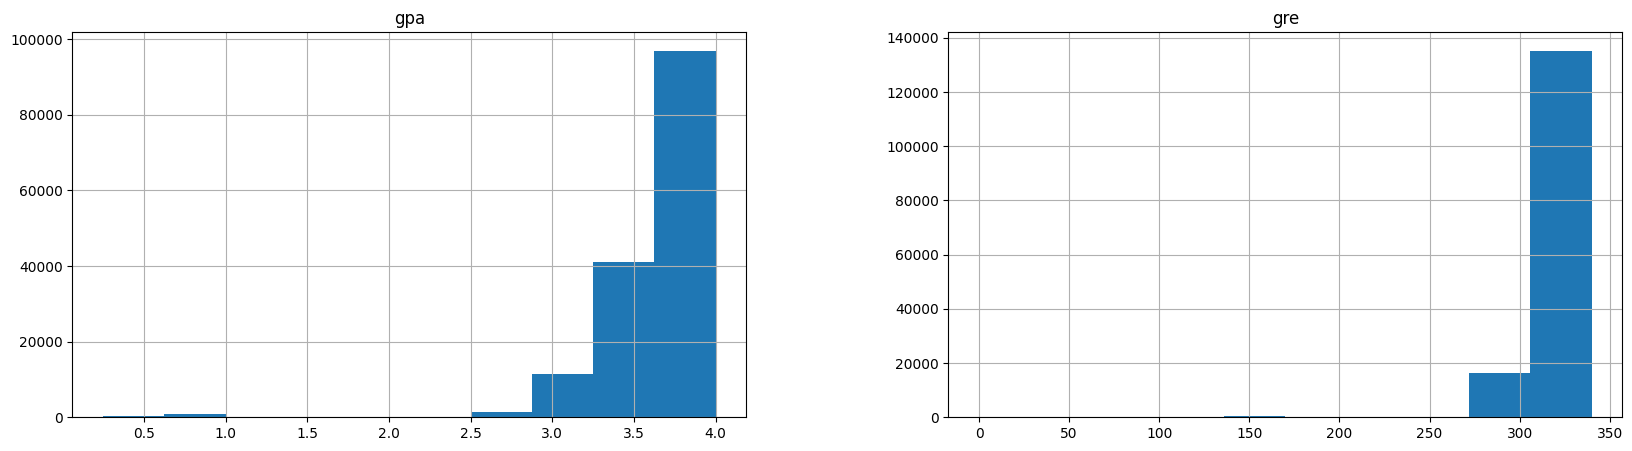

In [13]:
# Distribution of columns labels
grad_cafe.hist(figsize=(20,5), layout=(1,2))

**Based on these left skewed distributions, we can denote that respondents of the GradCafe dataset have a much stronger academic background comapred to the Kaggle dataset. Although, this dataset does not yield as much spread as the Kaggle dataset, we are provided some other useful information, such as major and degree, that might justify for a higher academic preformance.**

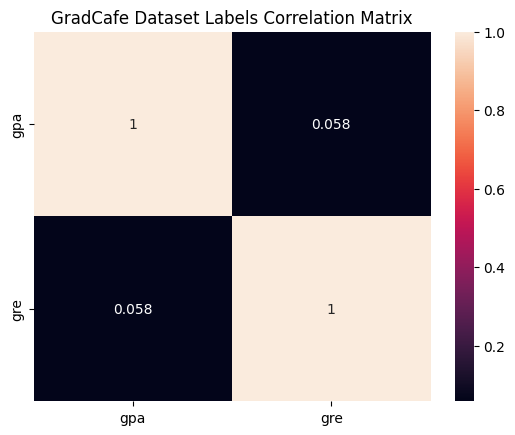

In [14]:
# Display correlation matrix
axes = plt.axes()

grad_cafe_correlation_matrix = grad_cafe[['gpa', 'gre']].corr()
grad_cafe_correlation_matrix = sns.heatmap(grad_cafe_correlation_matrix, ax=axes, annot=True)
axes.set_title('GradCafe Dataset Labels Correlation Matrix')

plt.show()

Pearson Product-Moment Correlations:

GPA vs. GRE Score: 0.05818730241160644


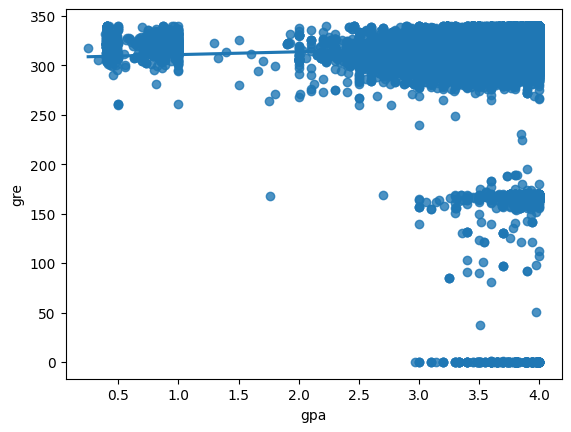

In [15]:
# Scatter plot: GRE Score vs Chance of Admission
sns.regplot(x='gpa', y='gre', data=grad_cafe, fit_reg=True)

# Get pearson product-moment correlation
gre__gpa_r, _ = scipy.stats.pearsonr(x=grad_cafe['gpa'], y=grad_cafe['gre'])

print('Pearson Product-Moment Correlations:\n')
print(f'GPA vs. GRE Score: {gre__gpa_r}')

**However, as a result of its lack of spread, the GradCafe data suggests a weak correlation between GPA and GRE Scores. Thus, we would need to preform deeper analysis, such as prediction models, to obtain a better understanding of graduate admissions.**

**We can study other factors, such as application results `notif_result` and degree level `degree`, to study the distribution.**

Accepted       77230
Rejected       52022
Interview      13669
Wait listed     8723
Other            612
Name: notif_result, dtype: int64

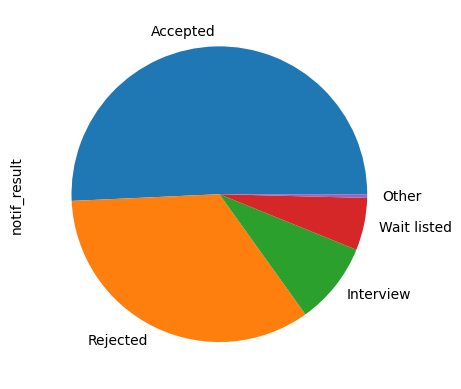

In [16]:
# Application results spread
result_counts = grad_cafe['notif_result'].value_counts()
result_counts.plot.pie()

result_counts

In [17]:
result_by = grad_cafe.groupby('notif_result')[['gpa', 'gre']].agg('mean')
result_by = result_by.reset_index()

result_by

,notif_result,gpa,gre
0,Accepted,3.660831,318.800013
1,Interview,3.677523,319.633404
2,Other,3.689118,307.318627
3,Rejected,3.637051,318.822575
4,Wait listed,3.668637,313.906569


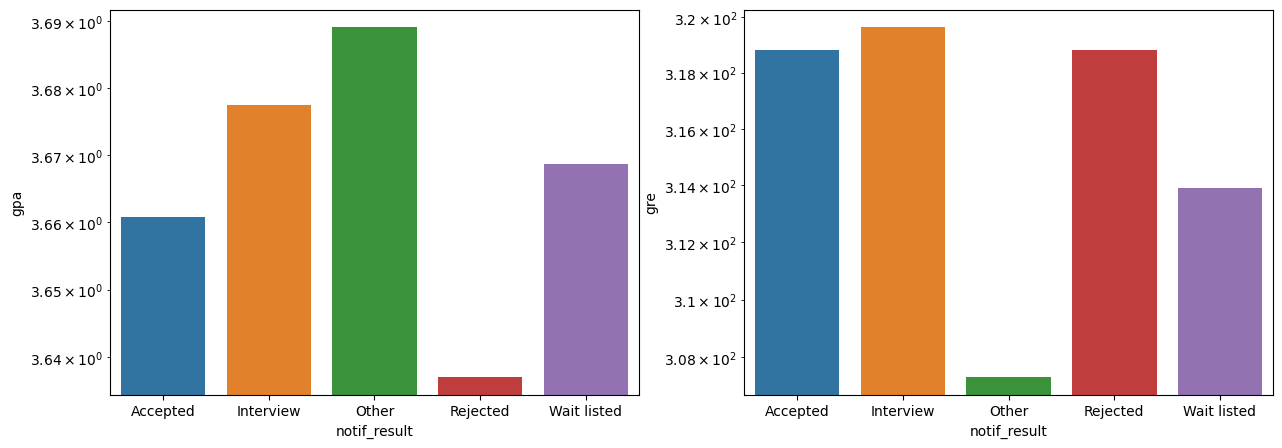

In [18]:
# Grouby distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of gpa by result
sns.barplot(x='notif_result', y='gpa', data=result_by, ax=axes[0]).set_yscale("log")

# Distribution of gre by result
sns.barplot(x='notif_result', y='gre', data=result_by, ax=axes[1]).set_yscale("log")

**Note: the bar graphs above are in `log` scale to closely inspect small differences in `gpa` and `gre` numbers.**

**Although we have a good distribution admission results from the pie chart, the average `gpa` and `gre` for each admission results is exhaustive. Interestingly, we observe that the average `gpa` for an `accepted` status is relatively lower; however, we could assume this portion to be higher, regarding if an `interview`, `wait listed`, or `other` meant an acceptance in the long-run. Yet, we see that an `other` status yields the lowest average `gre`.**

**We can preform the same data analysis on a smaller subset of applicants specifically by `major` such as, engineering and science applicants.**

### Example: By Engineering `Major`

In [19]:
# Filter dataset into engineering applicants
engineering_df = grad_cafe[grad_cafe['major'].str.contains('engineering|Engineering')]

engineering_df.head()

,submissionDate,institution,major,degree,notif_result,notif_date,gpa,gre
10,2010-01-13,Northwestern University,Civil And Environmental Engineering,Masters,Interview,2010-01-13,3.81,315.0
29,2010-01-14,Clemson University,Electrical & Computer Engineering,PhD,Accepted,2009-12-14,3.30,315.0
43,2010-01-14,"University Of Illinois, Urbana Champaign (UIUC)",Chemical And Biomolecular Engineering,PhD,Accepted,2010-01-13,3.96,326.0
57,2010-01-15,"University Of Wisconsin, Madison",Electrical Engineering,PhD,Accepted,2010-01-15,3.60,333.0
78,2010-01-16,"University Of Washington, Seattle",Chemical Engineering,PhD,Accepted,2010-01-15,3.93,316.0


In [20]:
engineering_df.describe()

,gpa,gre
count,24177.000000,24177.000000
mean,3.612834,320.814783
std,0.427362,14.414523
min,0.404000,0.000000
25%,3.500000,316.000000
50%,3.700000,322.000000
75%,3.880000,327.000000
max,4.000000,340.000000


array([[<AxesSubplot: title={'center': 'gpa'}>,
        <AxesSubplot: title={'center': 'gre'}>]], dtype=object)

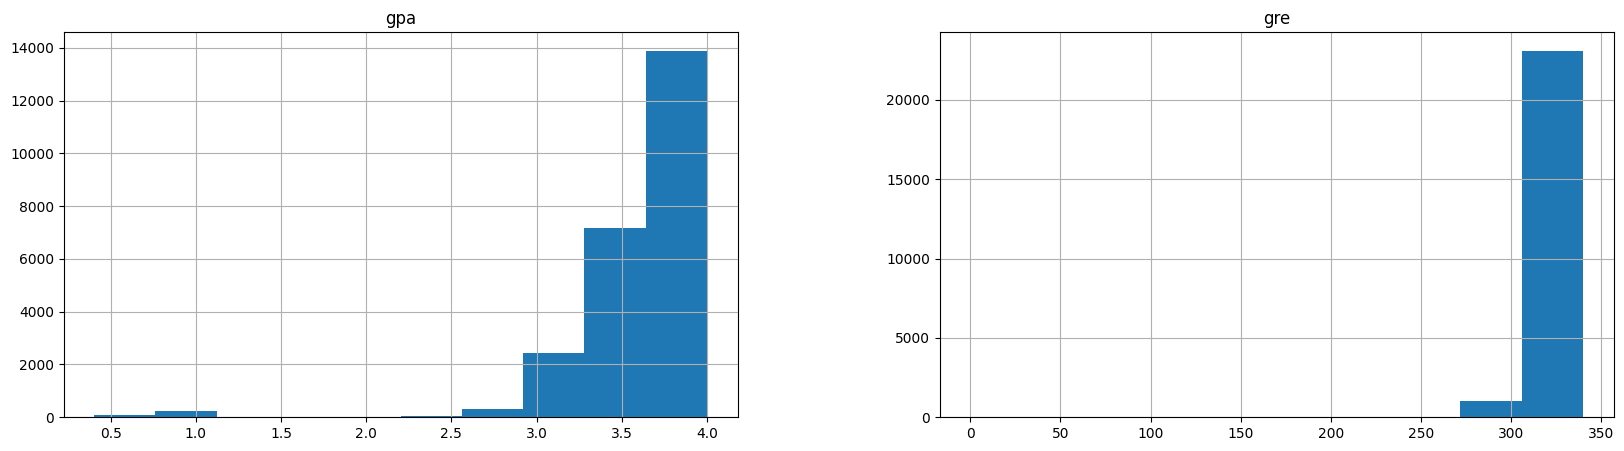

In [21]:
engineering_df.hist(figsize=(20,5), layout=(1,2))

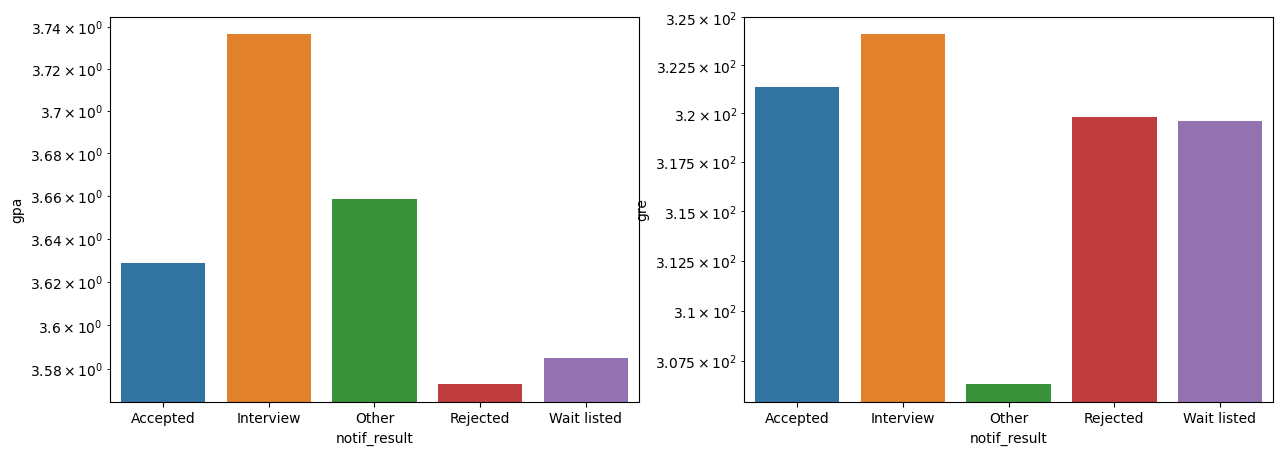

In [22]:
engineering_result_by = engineering_df.groupby('notif_result')[['gpa', 'gre']].agg('mean')
engineering_result_by = engineering_result_by.reset_index()

# Grouby distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of gpa by result
sns.barplot(x='notif_result', y='gpa', data=engineering_result_by, ax=axes[0]).set_yscale("log")

# Distribution of gre by result
sns.barplot(x='notif_result', y='gre', data=engineering_result_by, ax=axes[1]).set_yscale("log")

### Example: By Sciences `Major`

In [23]:
# Filter dataset into sciences applicants
sciences_df = grad_cafe[grad_cafe['major'].str.contains('science|Science')]

sciences_df.head()

,submissionDate,institution,major,degree,notif_result,notif_date,gpa,gre
0,2010-01-12,"University Of California, San Francisco (UCSF)",Neuroscience,PhD,Interview,2010-01-12,3.80,325.0
1,2010-01-12,"University Of California, San Francisco (UCSF)",Neuroscience,PhD,Interview,2010-01-12,3.86,326.0
4,2010-01-12,Carnegie Mellon,Biological Sciences (Neuroscience),PhD,Interview,2010-01-12,3.40,331.0
6,2010-01-12,"University Of California, San Francisco (UCSF)",Neuroscience,PhD,Interview,2010-01-12,3.90,319.0
9,2010-01-13,"University Of Illinois, Urbana Champaign (UIUC)",Computer Science,PhD,Accepted,2010-01-13,3.21,320.0


In [24]:
sciences_df.describe()

,gpa,gre
count,29733.000000,29733.000000
mean,3.622287,320.400027
std,0.422452,13.021185
min,0.250000,0.000000
25%,3.500000,315.000000
50%,3.700000,322.000000
75%,3.880000,328.000000
max,4.000000,340.000000


array([[<AxesSubplot: title={'center': 'gpa'}>,
        <AxesSubplot: title={'center': 'gre'}>]], dtype=object)

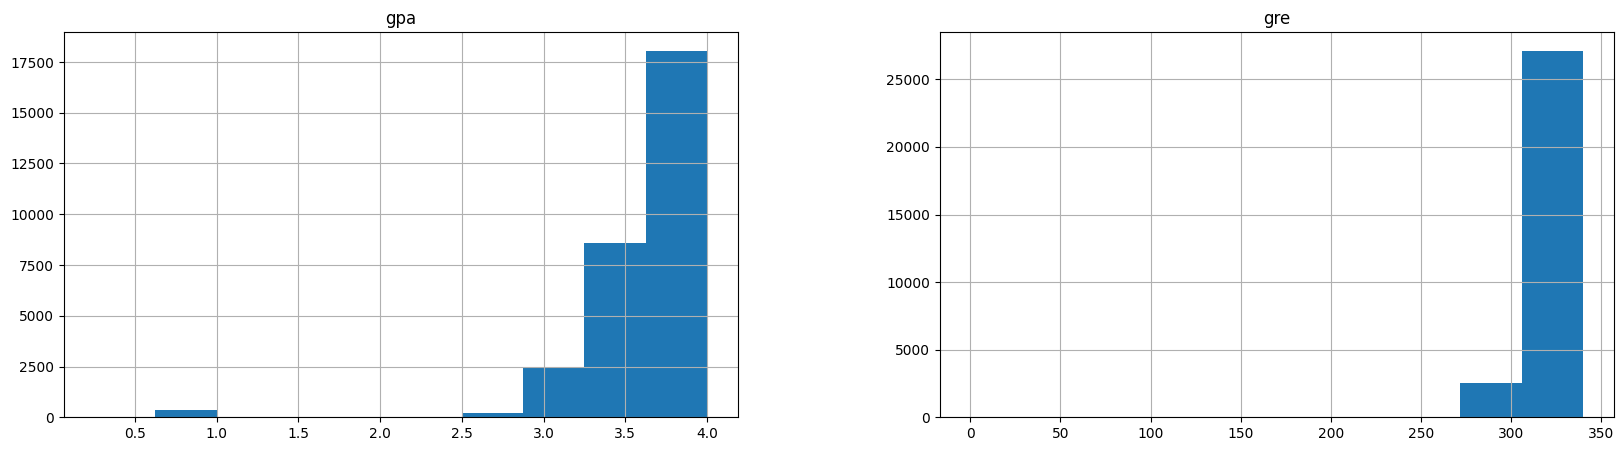

In [25]:
sciences_df.hist(figsize=(20,5), layout=(1,2))

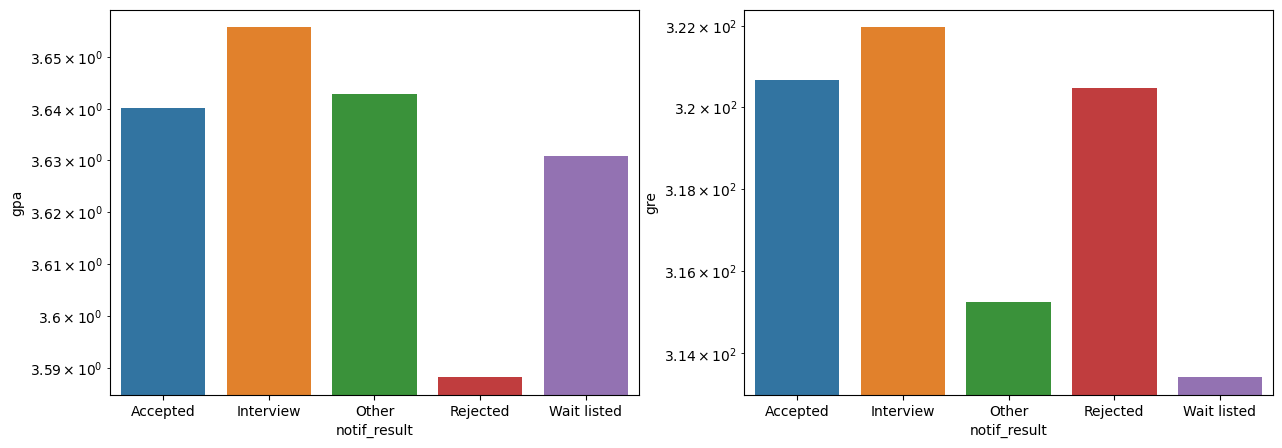

In [26]:
sciences_result_by = sciences_df.groupby('notif_result')[['gpa', 'gre']].agg('mean')
sciences_result_by = sciences_result_by.reset_index()

# Grouby distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of gpa by result
sns.barplot(x='notif_result', y='gpa', data=sciences_result_by, ax=axes[0]).set_yscale("log")

# Distribution of gre by result
sns.barplot(x='notif_result', y='gre', data=sciences_result_by, ax=axes[1]).set_yscale("log")